In [83]:
!pip install pycaret

# Setup

In [84]:
# get the data from the download data wine zip file and unzip it
!wget -q https://archive.ics.uci.edu/static/public/186/wine+quality.zip -O wine.zip
!unzip -q wine.zip

# read the red wine quality data and store the values which are seperated by semicolons and save into data
import pandas as pd
data = pd.read_csv("winequality-red.csv",delimiter=";")
# quick display of data
data

replace winequality-red.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


The setup function sets up the training environment and constructs the transformation pipeline. The setup function in pycaret necessitates two mandatory parameters: 'data' and 'target'. While all other parameters remain optional, the setup function configures the dataset, designating 'quality' as the target variable, and considers all remaining columns as features.

In [85]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'quality', session_id = 123)

,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original data shape,"(1599, 12)"
5,Transformed data shape,"(1599, 12)"
6,Transformed train set shape,"(1119, 12)"
7,Transformed test set shape,"(480, 12)"
8,Numeric features,11
9,Preprocess,True


The target will be mapped by converting the classifications from 3-8 to be 0-5 respectively. For example, the classification mapped to be 3 is the true quality of 6.

# Compare Different PyCaret Models

The compare_models() function in PyCaret facilitates model selection by evaluating various machine learning models with default settings, identifying the best-performing one based on predefined metrics. Executing best = compare_models() enables storing the top-performing model for further fine-tuning and use in subsequent steps of the machine learning pipeline, streamlining the selection process for optimal model choice to predict qine quality.

In [86]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6702,0.5871,0.6702,0.6485,0.6494,0.4612,0.4667,0.4430
xgboost,Extreme Gradient Boosting,0.6622,0.5663,0.6622,0.6420,0.6479,0.4581,0.4607,0.3290
rf,Random Forest Classifier,0.6595,0.5761,0.6595,0.6323,0.6388,0.4444,0.4500,0.3750
lightgbm,Light Gradient Boosting Machine,0.6497,0.5725,0.6497,0.6277,0.6342,0.4365,0.4403,1.3640
gbc,Gradient Boosting Classifier,0.6336,0.5463,0.6336,0.6173,0.6219,0.4151,0.4173,1.6480
lr,Logistic Regression,0.6032,0.5297,0.6032,0.5717,0.5746,0.3422,0.3483,1.6680
lda,Linear Discriminant Analysis,0.5987,0.5329,0.5987,0.5806,0.5845,0.3558,0.3586,0.0380
ridge,Ridge Classifier,0.5880,0.0000,0.5880,0.4973,0.5318,0.2989,0.3103,0.0320
dt,Decision Tree Classifier,0.5872,0.4659,0.5872,0.5837,0.5821,0.3556,0.3572,0.0470
nb,Naive Bayes,0.5558,0.5033,0.5558,0.5628,0.5551,0.3141,0.3162,0.1260


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

How the different performance metrics are useful to judge performances:
Accuracy measures the proportion of correctly classified instances and is useful for assessing overall model performance.

AUC (Area Under the Curve) of the ROC (Receiver Operating Characteristic) curve summarizes the model's ability to distinguish between classes and is particularly effective for imbalanced datasets.

Recall (Sensitivity) quantifies the model's ability to correctly identify positive instances among all actual positives, crucial in scenarios where identifying all positives is paramount.

Precision measures the accuracy of positive predictions and is valuable when the focus is on minimizing false positives.

F1 score, the harmonic mean of precision and recall, provides a balance between the two metrics and is beneficial when both precision and recall need consideration.

Kappa (Cohen's Kappa) assesses inter-rater agreement beyond chance, especially useful for evaluating classification models on imbalanced datasets.

MCC (Matthews Correlation Coefficient) captures the correlation between actual and predicted classes, particularly robust for imbalanced datasets due to its balanced nature.


The comparison shows, out of all the classification models from SVM to Extra Tress Classifier, the Extra Trees Classifier (et) has the best performance metrics in terms of accuracy, AUC, recall, precision, F1 score, kappa, and Matthews Correlation Coefficient (MCC). The accuracy is the performance metric most important for this dataset.

This is because, in a scenario where all classes bear equal significance and the costs linked to false positives and false negatives hold similar weight, prioritizing accuracy as the primary performance metric is justified. When there are no serious repercussions associated with misclassifications and the importance of getting predictions right equals that of getting them wrong, accuracy emerges as the most pertinent evaluation criterion. This is the case for classifying whether the wine has a quality between 0 and 10. Given that determining the quality of the wine doesn't demand minimizing false negatives at a higher cost of false positives or vice versa, recall, which specifically targets the minimization of false negatives, becomes less crucial in this instance. Additionally, in the absence of an uneven class distribution where F1 score, balancing precision and recall, might be essential, accuracy takes precedence as it ensures an impartial assessment of the model's predictive capability across all classes without disproportionately favoring any specific aspect of classification. Hence, in this context characterized by equal class importance, similar misclassification costs, and no serious implications for mispredictions, optimizing and comparing all the models based on accuracy alone aligns well with the overarching goal of predicting the quality of the wine.



# Analzing the Extra Trees Classifier Model

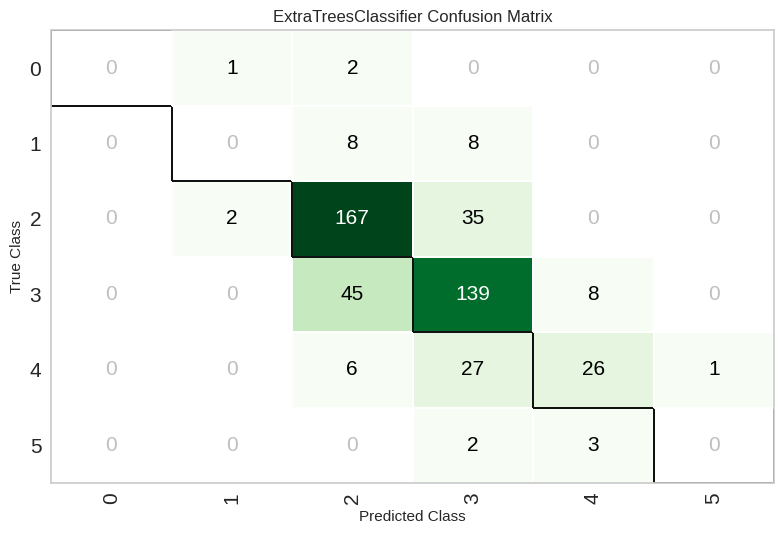

In [87]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

The confusion matrix visually displays the performance of the et machine learning model by tabulating the counts of true positive, true negative, false positive, and false negative predictions, providing insights into the model's classification performance across different classes. The values along the diagonal illustrates the true positive values.

Looking at the confusion matrix one can determine that most of the classifications that were incorrect were from the model predicting the classification of 2 (quality of 5) when it was actually class 3 (quality of 6) and vise versa when predicting the class 3.

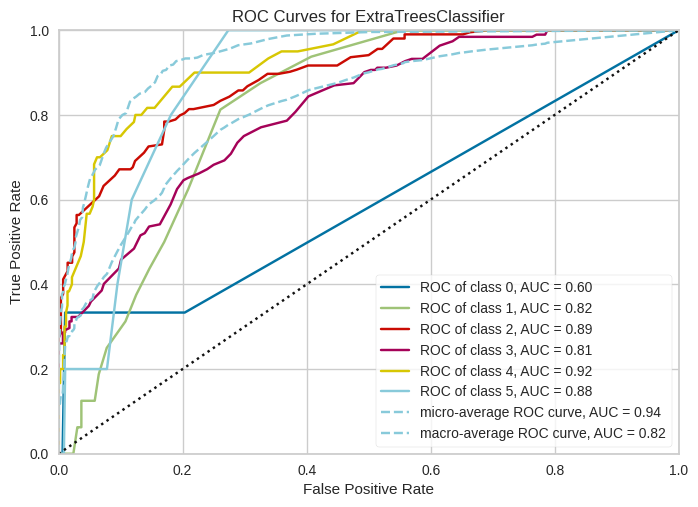

In [88]:
# plot AUC
plot_model(best, plot = 'auc')

The Area Under the Curve (AUC) metric illustrates the model's ability to distinguish between classes by summarizing the trade-off between true positive rate and false positive rate across various threshold values for classification. An AUC of 1 would be perfect model performance, signifying that the classifier can perfectly distinguish between the positive and negative classes without any misclassifications.

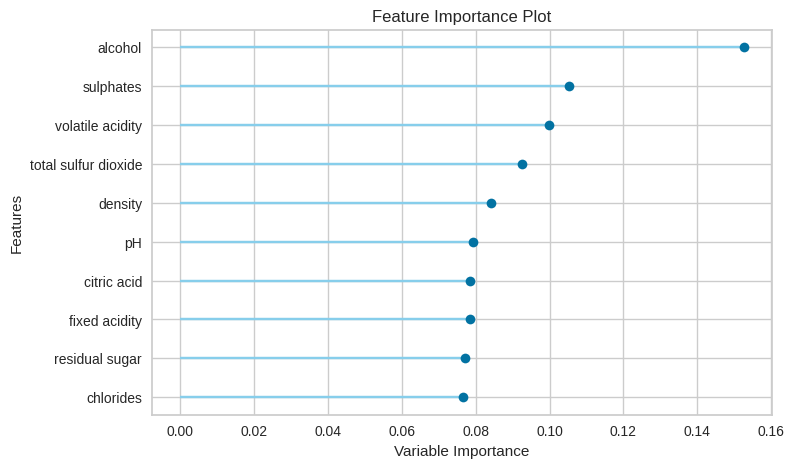

In [89]:
# plot feature importance
plot_model(best, plot = 'feature')

A plot of feature importance showcases the relative significance or contribution of each feature in a machine learning model's decision-making process, providing insights into which features are most influential in predicting the target variable. In the feature importance plot, one can see that alcohol is the most important feature with an importance of about 0.15. Chlorides is also seen to be the least important variable with an importance of about 0.08.

# Optimizing the Data Preprocessing and Hyperparameters

In [90]:
from pycaret.classification import *
s = setup(data, target = 'quality', session_id = 123, normalize= True, normalize_method = 'robust', pca = True, fold = 15)

,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original data shape,"(1599, 12)"
5,Transformed data shape,"(1599, 12)"
6,Transformed train set shape,"(1119, 12)"
7,Transformed test set shape,"(480, 12)"
8,Numeric features,11
9,Preprocess,True


The utilization of normalize=True assists in ensuring uniform feature scales within the dataset, a necessity observed from varying magnitudes across features, preventing bias toward certain features during model training. Employing normalize_method='robust' becomes crucial due to the presence of outliers detected within the dataset, warranting a robust scaling approach that reduces the influence of these extreme values on the model's learning process. Additionally, the decision to enable pca=True aligns with the need to handle high dimensionality within the dataset, observed through the presence of numerous features, aiming to alleviate computational complexity and potential overfitting. Lastly, opting for fold=15 in cross-validation suggests a desire for a more comprehensive assessment of model performance, potentially due to the dataset's complexity or variability, necessitating a more thorough evaluation across 15 folds to derive reliable performance metrics.

In [91]:
best_optimized = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6899,0.2776,0.6899,0.6663,0.6680,0.4936,0.4992,0.4153
et,Extra Trees Classifier,0.6854,0.2816,0.6854,0.6590,0.6616,0.4851,0.4931,0.4073
xgboost,Extreme Gradient Boosting,0.6737,0.2715,0.6737,0.6475,0.6554,0.4750,0.4791,0.5953
lightgbm,Light Gradient Boosting Machine,0.6657,0.2722,0.6657,0.6419,0.6476,0.4601,0.4647,2.7633
gbc,Gradient Boosting Classifier,0.6292,0.2610,0.6292,0.6129,0.6154,0.4073,0.4109,2.8233
lr,Logistic Regression,0.6050,0.2534,0.6050,0.5821,0.5811,0.3522,0.3577,0.0967
lda,Linear Discriminant Analysis,0.5978,0.2534,0.5978,0.5822,0.5819,0.3542,0.3582,0.0493
dt,Decision Tree Classifier,0.5960,0.2305,0.5960,0.5943,0.5902,0.3678,0.3708,0.0960
ridge,Ridge Classifier,0.5915,0.0000,0.5915,0.4959,0.5344,0.3046,0.3168,0.0547
nb,Naive Bayes,0.5575,0.2427,0.5575,0.5654,0.5491,0.2974,0.3034,0.0660


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

By using the preprocessing techniques annd hyperparameter adjustments, it resulted in an increase in accuracy from 0.6702 to 0.6899. Thus, the adjusted were slightly beneficial for the overall accuracy.

# Class Merging

To simplify the classification task and address misclassifications observed between qualities 5 and 6, a decision was made to merge these two qualities into a single class. In this reclassification scheme, the qualities were mapped to classes as follows: 3 maps to class 0, 4 maps to class 1, 5 and 6 both map to class 2, 7 maps to class 3, and 8 maps to class 4, effectively reducing the range of distinct classes from 0 to 5 to improve model performance.

In [92]:
from pycaret.classification import *

# 'quality' is the target column
data['quality_mapped'] = data['quality'].map({3: 0, 4: 1, 5: 2, 6: 2, 7: 3, 8: 4})
data_mapped = data.drop('quality',axis=1)
data_mapped


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_mapped
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2


In [93]:
# Initialize setup with the mapped target column
s_mapped = setup(data=data_mapped, target='quality_mapped', session_id=123, normalize= True, normalize_method = 'robust', pca = True, fold = 15)
best_mapped = compare_models()

,Description,Value
0,Session id,123
1,Target,quality_mapped
2,Target type,Multiclass
3,Original data shape,"(1599, 12)"
4,Transformed data shape,"(1599, 12)"
5,Transformed train set shape,"(1119, 12)"
6,Transformed test set shape,"(480, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8705,0.2863,0.8705,0.8179,0.8349,0.4128,0.4665,0.2467
rf,Random Forest Classifier,0.8678,0.2776,0.8678,0.8244,0.8350,0.4140,0.4646,0.4333
lightgbm,Light Gradient Boosting Machine,0.8615,0.2703,0.8615,0.8201,0.8350,0.4296,0.4627,2.3120
xgboost,Extreme Gradient Boosting,0.8606,0.2753,0.8606,0.8213,0.8354,0.4343,0.4617,0.5533
gbc,Gradient Boosting Classifier,0.8508,0.2718,0.8508,0.8157,0.8277,0.4007,0.4221,2.2807
lr,Logistic Regression,0.8337,0.2662,0.8337,0.7882,0.7965,0.2609,0.3080,0.1353
ridge,Ridge Classifier,0.8248,0.0000,0.8248,0.7220,0.7552,0.0457,0.0814,0.0453
dummy,Dummy Classifier,0.8248,0.1667,0.8248,0.6804,0.7457,0.0000,0.0000,0.0413
lda,Linear Discriminant Analysis,0.8221,0.2640,0.8221,0.7840,0.7960,0.2804,0.2985,0.0467
knn,K Neighbors Classifier,0.8195,0.2511,0.8195,0.7718,0.7920,0.2732,0.2884,0.0907


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

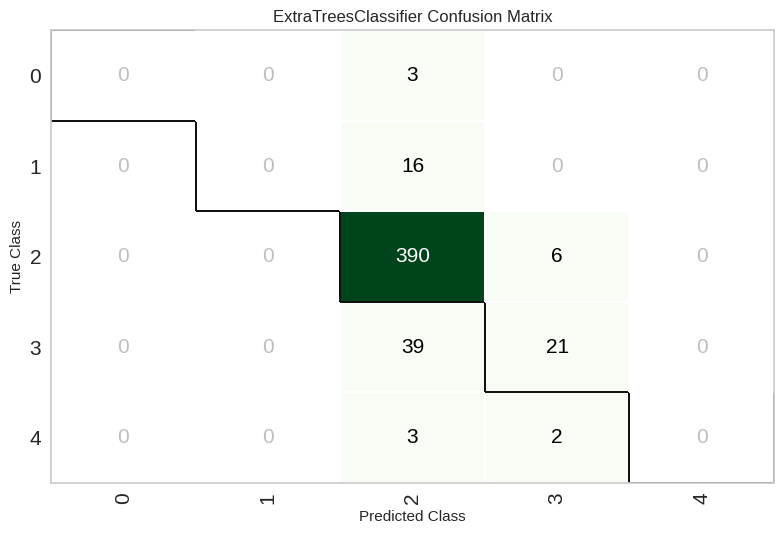

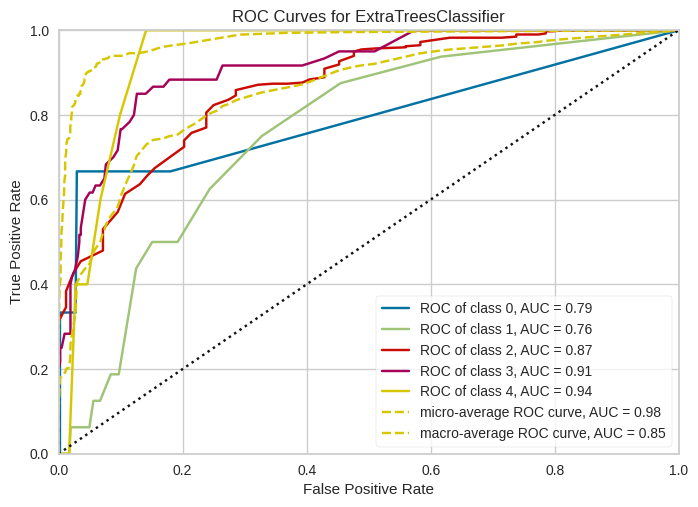

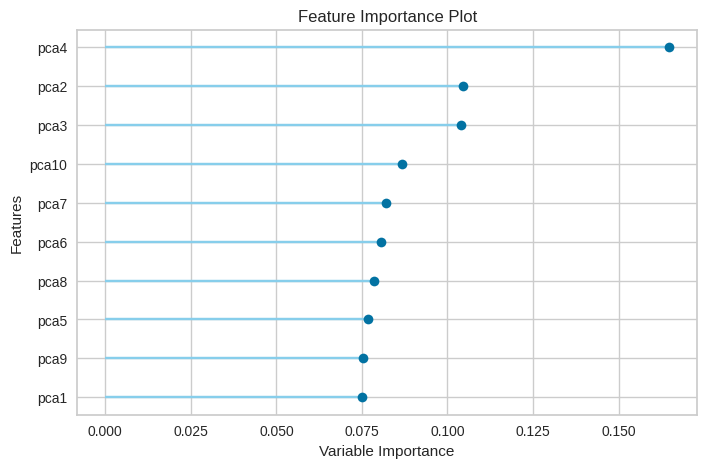

In [94]:
# plot confusion matrix
plot_model(best_mapped, plot = 'confusion_matrix')
# plot AUC
plot_model(best_mapped, plot = 'auc')
# plot feature importance
plot_model(best_mapped, plot = 'feature')

# Predicting Quality of 5 or 6


By merging qualities 5 and 6 into a single class, there's a need to discern between the original qualities 5 and 6 in certain scenarios. To address this, one approach involves initially predicting whether the quality falls within the combined class or not. Then, employing a separate model specifically tailored to discriminate between the qualities 5 and 6 can be beneficial. This secondary model's purpose is to exclusively determine whether a sample initially classified into the merged class corresponds to quality 5 or 6, streamlining focus on distinguishing between these specific grades without the distraction of other class considerations.

In [95]:
data56 = data[(data['quality'] == 5) | (data['quality'] == 6)]
data56 = data56.drop('quality_mapped',axis=1)
data56

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [96]:
s = setup(data = data56, target='quality', session_id=123, normalize= True, normalize_method = 'robust', pca = True, fold = 15)
best2 = compare_models()

,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Binary
3,Target mapping,"5: 0, 6: 1"
4,Original data shape,"(1319, 12)"
5,Transformed data shape,"(1319, 12)"
6,Transformed train set shape,"(923, 12)"
7,Transformed test set shape,"(396, 12)"
8,Numeric features,11
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7899,0.8688,0.7899,0.7944,0.7890,0.5792,0.5837,0.3300
rf,Random Forest Classifier,0.7856,0.8637,0.7856,0.7910,0.7844,0.5700,0.5757,0.4153
xgboost,Extreme Gradient Boosting,0.7778,0.8459,0.7778,0.7828,0.7766,0.5549,0.5599,0.2280
lightgbm,Light Gradient Boosting Machine,0.7714,0.8474,0.7714,0.7759,0.7705,0.5418,0.5465,0.3493
gbc,Gradient Boosting Classifier,0.7606,0.8300,0.7606,0.7662,0.7590,0.5195,0.5255,0.3487
ada,Ada Boost Classifier,0.7315,0.7927,0.7315,0.7360,0.7300,0.4616,0.4664,0.2260
dt,Decision Tree Classifier,0.7248,0.7248,0.7248,0.7282,0.7241,0.4495,0.4526,0.0540
knn,K Neighbors Classifier,0.7075,0.7538,0.7075,0.7119,0.7059,0.4155,0.4193,0.0633
ridge,Ridge Classifier,0.7031,0.0000,0.7031,0.7090,0.7001,0.4033,0.4102,0.0460
lda,Linear Discriminant Analysis,0.7020,0.7735,0.7020,0.7081,0.6989,0.4012,0.4082,0.0487


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

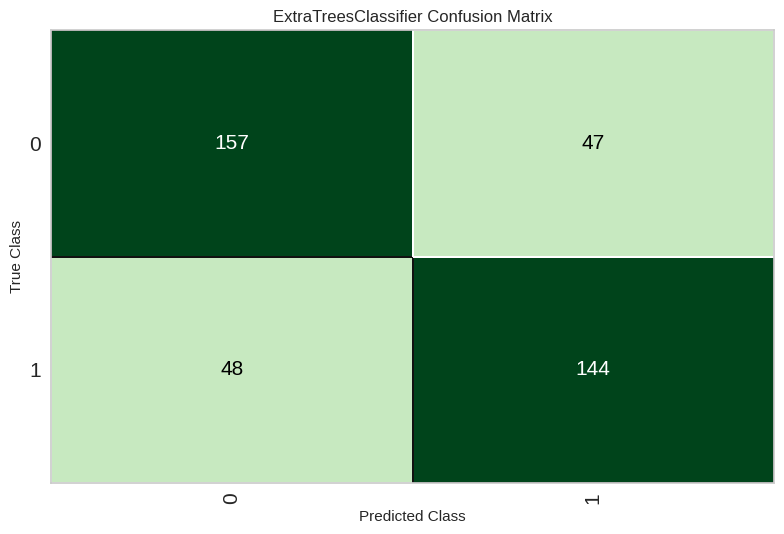

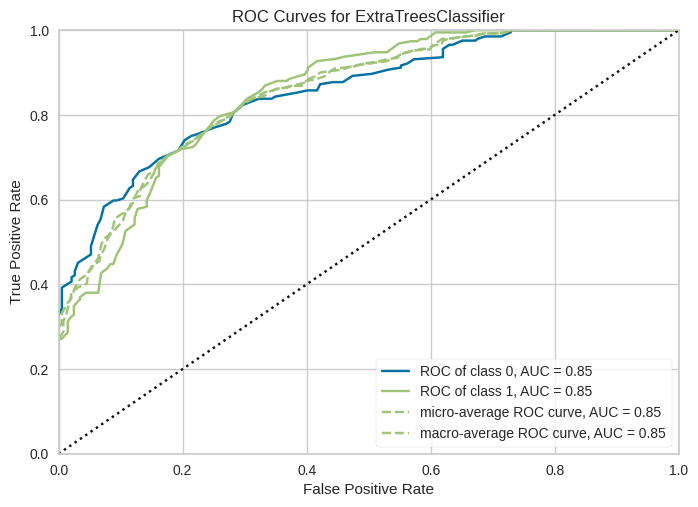

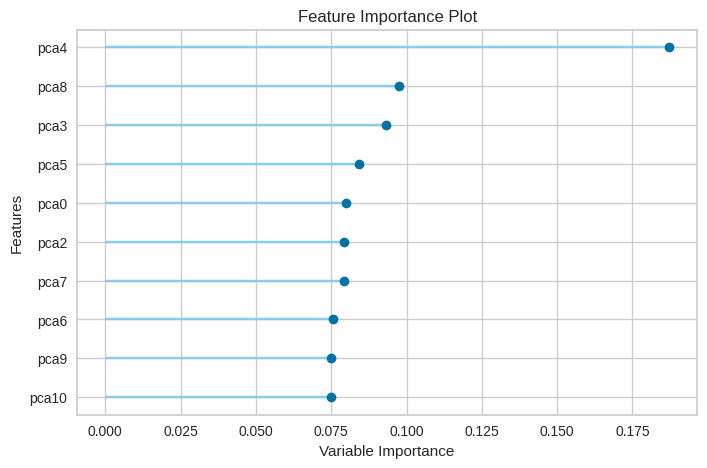

In [97]:
# plot confusion matrix
plot_model(best2, plot = 'confusion_matrix')
# plot AUC
plot_model(best2, plot = 'auc')
# plot feature importance
plot_model(best2, plot = 'feature')

# Conclusion

The dataset underwent predictive modeling to ascertain wine quality, yielding an overall accuracy of 68.99% using the 11 available features. Rigorous experimentation involving various preprocessing techniques and hyperparameters was conducted to enhance model accuracy. Through systematic testing, the random forest classifier emerged as the most accurate model, showcasing its efficacy in wine quality prediction. Additionally, the extra trees classifier and extreme gradient boosting were closely competitive, demonstrating promising performance as well. These findings highlight the extensive exploration undertaken to identify optimal preprocessing methods and hyperparameter configurations, ultimately pinpointing the random forest classifier as the standout model in predicting wine quality from the dataset.